# Neural Network for Leafs

## Preliminaries

In [1]:
import sys
import os
print('Current working directory:', os.getcwd())
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
%matplotlib notebook
# If academia_ai is not installed, include its path here (you might have to enter your custom path here)
path_to_academia_ai = os.path.join(os.pardir, os.pardir)
if path_to_academia_ai not in sys.path:
    sys.path.append(path_to_academia_ai)
import academia_ai as ai

Current working directory: /home/patrick/Dropbox/academia_2016/academia_ai/academia_ai/examples
Reloaded cnn!
Reloaded leafs!
Loaded preprocessing!
Reloaded plotting!


## Load leaf data

<IPython.core.display.Javascript object>


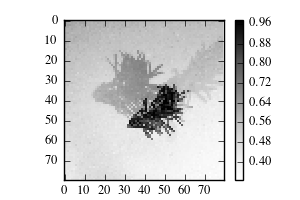

In [2]:
if 1:    
    path = '../leafs/data/80x80/'
    data = ai.preprocessing.createTrainingAndTestingList(path, shuffle = True)
    trainset = data[0]
    testset = data[1]
    #ai.preprocessing.normalize(trainset) 
    #ai.preprocessing.normalize(testset) # note: this is illegal!

    #take from training and testing only the matrixes, not the whole object "leaf"
    training_images = [np.array(leaf.image) for leaf in trainset]
    training_solutions = [ai.preprocessing.desired_output(leaf.label) for leaf in trainset]
    test_images = [np.array(leaf.image) for leaf in testset]
    test_solutions = [ai.preprocessing.desired_output(leaf.label) for leaf in testset]

    # Plot of an example image
    if 1:
        plt.figure(figsize=(3,2))
        plt.imshow(training_images[0], cmap='Greys', interpolation='none')
        plt.colorbar()

In [3]:
def mean_var(list_of_images):
    mean = np.mean(np.array(list_of_images))
    var = np.var(np.array(list_of_images))
    return mean, var

def weak_preprocessing():
    for i in range(len(training_images)):
        training_images[i] = (training_images[i] - mean) / var
    for j in range(len(test_images)):
        test_images[j] = (test_images[j] - mean) / var

In [4]:
mean, var = mean_var(training_images)
var = min(var, 0.2)
var = 1
print(mean, var)
if 0:
    weak_preprocessing()

0.422170871634 1


<IPython.core.display.Javascript object>


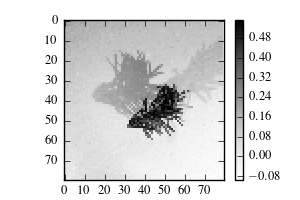

In [5]:
plt.figure(figsize=(3,2))
plt.imshow(training_images[0], cmap='Greys', interpolation='none')
plt.colorbar()

## Create layers and build neural network

In [19]:
if 0:
    # 1 Layer Network
    full = ai.ConvolutionalNeuralNet()
    full_l1 = ai.FullyConnectedLayer(input_shape=(1,80,80), output_shape=(7,1,1))
    full.add_layer(full_l1)
    
    # 2 Layer Networks
    conv_full_s = ai.ConvolutionalNeuralNet()
    conv_full_s_l1 = ai.ConvolutionLayer(nr_filters = 7, filter_shape=(5,5))
    conv_full_s_l2 = ai.FullyConnectedLayer(input_shape=(7,80,80), output_shape=(7,1,1))
    conv_full_s.add_layer(conv_full_s_l1)
    conv_full_s.add_layer(conv_full_s_l2)
    
    conv_full_m = ai.ConvolutionalNeuralNet()
    conv_full_m_l1 = ai.ConvolutionLayer(nr_filters = 14, filter_shape=(7,7))
    conv_full_m_l2 = ai.FullyConnectedLayer(input_shape=(14,80,80), output_shape=(7,1,1))
    conv_full_m.add_layer(conv_full_m_l1)
    conv_full_m.add_layer(conv_full_m_l2)
    
    conv_full_l = ai.ConvolutionalNeuralNet()
    conv_full_l_l1 = ai.ConvolutionLayer(nr_filters = 21, filter_shape=(9,9))
    conv_full_l_l2 = ai.FullyConnectedLayer(input_shape=(21,80,80), output_shape=(7,1,1))
    conv_full_l.add_layer(conv_full_l_l1)
    conv_full_l.add_layer(conv_full_l_l2)
    
    tanh_full = ai.ConvolutionalNeuralNet()
    tanh_full_l1 = ai.HyperbolicTangentLayer()
    tanh_full_l2 = ai.FullyConnectedLayer(input_shape=(1,80,80), output_shape=(7,1,1))
    tanh_full.add_layer(tanh_full_l1)
    tanh_full.add_layer(tanh_full_l2)
    
    '''
    # 3 Layer Networks
    conv_tanh_full_s = ai.ConvolutionalNeuralNet()
    conv_tanh_full_s_l1 = ai.ConvolutionLayer(nr_filters = 7, filter_shape=(5,5))
    conv_tanh_full_s_l2 = ai.
    conv_tanh_full_s_l3 = ai.FullyConnectedLayer(input_shape=(7,80,80), output_shape=(7,1,1))
    conv_tanh_full_s.add_layer(conv_full_s_l1)
    conv_tanh_full_s.add_layer(conv_full_s_l2)
    conv_tanh_full_s.add_layer(conv_full_s_l3)

    
    
    
    tanh_conv_full = ai.ConvolutionalNeuralNet()
    tanh_conv_full_l1 = ai.HyperbolicTangentLayer()
    tanh_conv_full_l2 = ai.FullyConnectedLayer(input_shape=(1,80,80), output_shape=(7,1,1))
    tanh_conv_full_l3 = ai.FullyConnectedLayer(input_shape=(1,80,80), output_shape=(7,1,1))
    tanh_conv_full.add_layer(tanh_full_l1)
    tanh_conv_full.add_layer(tanh_full_l2)
    tanh_conv_full.add_layer(tanh_full_l3)
    '''
    
    networks = {'full': full, 'conv_full_s': conv_full_s,
                'conv_full_m': conv_full_m, 'conv_full_l': conv_full_l,
                'tanh_full': tanh_full}

In [7]:
if 0:
    net1 = 1

    if net1 == 1: #one training takes 80s  
        conv = ai.ConvolutionLayer(nr_filters = 7, filter_shape=(3,3), stride=1)
        relu = ai.ReLuLayer()
        full = ai.FullyConnectedLayer(input_shape=(7,80,80), output_shape=(7,1,1))

        net1 = ai.ConvolutionalNeuralNet() 
        net1.add_layer(conv)  
        net1.add_layer(relu)
        net1.add_layer(full)


    if net1 == 2: #one training takes 500s
        cl = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
        relu1 = ai.ReLuLayer(iid = 1)
        full1 = ai.FullyConnectedLayer(input_shape=(9,50,50), output_shape=(3,10,10))

        cl2 = ai.ConvolutionLayer(nr_filters=3, filter_shape=(5,5), stride=1)
        relu2 = ai.ReLuLayer(iid = 2)
        full2 = ai.FullyConnectedLayer(input_shape=(9,10,10), output_shape=(7,1,1))

        net1 = ai.ConvolutionalNeuralNet() 
        net1.add_layer(cl)  
        net1.add_layer(relu1)
        net1.add_layer(full1)
        net1.add_layer(cl2)
        net1.add_layer(relu2)
        net1.add_layer(full2)

        net1.pprint()

    if net1 == 3:
        cl = ai.ConvolutionLayer(nr_filters=12, filter_shape=(9,9), stride=1)
        cl2 = ai.ConvolutionLayer(nr_filters=9, filter_shape=(9,9), stride=1)
        #th = ai.HyperbolicTangentLayer()
        #sig= ai.SigmoidLayer(learning=False)
        relu = ai.ReLuLayer()
        full = ai.FullyConnectedLayer(input_shape=(12,50,50), output_shape=(7,1,1))

        net1 = ai.ConvolutionalNeuralNet() 
        net1.add_layer(cl)  
        net1.add_layer(relu)
        #net1.add_layer(cl2)
        net1.add_layer(full)

        net1.pprint()

# Do some training and save the net

In [57]:
learning_rate = 1e-5
iterations = 1
for k, n in networks.items():
    print('Training:', k)
    n.train2(training_images, training_solutions, test_images, test_solutions, learning_rate, iterations, True)

Training: full
Consumed time for  0  iteration: 1.9014793759997701  seconds.
Training: conv_full_s
Consumed time for  0  iteration: 66.66935337599716  seconds.
Training: conv_full_m
Consumed time for  0  iteration: 168.6010608789984  seconds.
Training: conv_full_l
Consumed time for  0  iteration: 363.4188059700027  seconds.
Training: tanh_full
Consumed time for  0  iteration: 2.8715852060013276  seconds.


In [10]:
net1.test_net(training_images, training_solutions)

0.8054711246200608

<IPython.core.display.Javascript object>


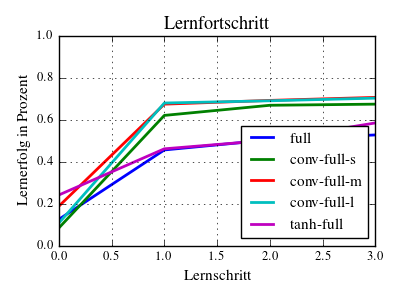

In [58]:
plt.figure(figsize=(4,3))
for k,n in networks.items():
    plt.plot(n.success_list, label=k.replace('_', '-'), linewidth=2)
plt.legend(loc='best')
plt.ylim(0,1)
plt.xlabel('Lernschritt')
plt.ylabel('Lernerfolg in Prozent')
plt.title('Lernfortschritt')
plt.grid(True)
plt.tight_layout()

Classified label: 6
Correct label: 6


<IPython.core.display.Javascript object>


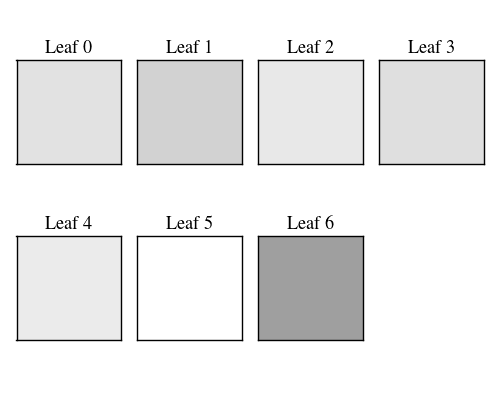

In [12]:
# Plot Network Output
leaf_ex = training_images[0]
sol_ex = training_solutions[0]
result = net1.forward_prop(leaf_ex, save_intermediate=True)
intermediate = net1.intermediate_results
print('Classified label:', np.argmax(result))
print('Correct label:', np.argmax(sol_ex))
# Plot the result after propagating through the net
fig, axarr = plt.subplots(2,4, figsize=(5,4))
for i in range(7):
    axarr.flatten()[i].imshow(result[i],cmap='Greys', vmin=-1, vmax=1)
    axarr.flatten()[i].set_title('Leaf '+str(i))
    axarr.flatten()[i].get_xaxis().set_visible(False)
    axarr.flatten()[i].get_yaxis().set_visible(False)
plt.delaxes(axarr.flatten()[7])
plt.tight_layout()

In [1]:
class MeanPoolingLayer(object):
    """Note: NotImplemented yet. Could reuse convolution?

    Reduce image size by averaging adjacent pixels.

    Parameter compression_factor specifies how many pixels to average
    in each dimension (x, y). Example: A 100x100 input image with
    compression_factor=2 is transformed to a 50x50 output image.

    The compression_factor should divide the dimensions of the input image.
    """

    def __init__(self, compression_factor=2):
        self.cf = compression_factor
        raise NotImplemented

    def forward_prop(self, input_data):
        output_shape = (input_data.shape[0], input_data.shape[1]//self.cf,
                        input_data.shape[2]/self.cf)
        output = np.zeros(output_shape)
        return output

    def back_prop(self, data, learning_rate):
        pass
